# Future in Charges: Stage I

<div>
<img src="https://d2cbg94ubxgsnp.cloudfront.net/Pictures/2000x1125/0/5/0/520050_gettyimages1312206974_436248_crop.jpg" width="span">
</div>

## Introduction: Poisson-Boltzmann and the Electrical Double Layer

Welcome Xeekers! This challenge centers around the general concept of [Function Approximation](https://en.wikipedia.org/wiki/Function_approximation), for the non-linear [Poisson-Boltzmann Equation (PBE)](https://en.wikipedia.org/wiki/Poisson%E2%80%93Boltzmann_equation) applied to [electrochemical devices](https://en.wikipedia.org/wiki/Electrochemical_cell). The overarching contest is partitioned into three functional challenge stages (Stage 1, Stage 2, and Stage 3), where each Stage focuses on a flavor of the problem formlated in 1-, 2- and 3-dimensions, respectively.

An [electrical double layer](https://en.wikipedia.org/wiki/Double_layer_(surface_science)) is a concept describing the surface of a solid/liquid/gas object (or a porous body) when it is exposed to a fluid. "The double layer refers to two parallel layers of charge surrounding the object." And the PBE "aims to describe the distribution of the electric potential in solution in the direction normal to a charged surface. This distribution is important to determine how the electrostatic interactions will affect the molecules in solution." -Wikipedia

Here in Stage 1, we're modeling the relationship embodied in both [Figure 1](https://www.mdpi.com/sensors/sensors-19-03425/article_deploy/html/images/sensors-19-03425-g004.png) and [Figure 2](https://www.researchgate.net/profile/Shao-Long-Zhong/publication/324863849/figure/fig1/AS:621456245407745@1525178123972/Double-layer-model-of-interface-from-Lewis-a-The-diffuse-electrical-double-layer-model.png) below. An electrical potential profile within the EDL is maximum on the particle surface (Stern layer); as the distance increases from the surface, the potential drops to zero at the EDL boundary (diffuse layer).
<hr>

#### FIGURE 1
<div>
<img src="https://www.mdpi.com/sensors/sensors-19-03425/article_deploy/html/images/sensors-19-03425-g004.png" width="800">
</div>
<hr>

#### FIGURE 2
<div>
<img src="https://www.researchgate.net/profile/Shao-Long-Zhong/publication/324863849/figure/fig1/AS:621456245407745@1525178123972/Double-layer-model-of-interface-from-Lewis-a-The-diffuse-electrical-double-layer-model.png" width="400">
</div>
<hr>
<hr>

## Goal: curve-fitting in one dimension

The objective for Stage 1 of this multi-stage challenge is to empirically fit a set of 1D curves without knowledge of the analytical equation. This is the warm-up to the rodeo, so feel free to blaze right on through!

## Data availability
1. CSV file containing the set of input parameters and initial conditions.
2. CSV file containing the resulting curves.

## Import Libraries and Modules

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset Preview

In this section, the input parameters are read in and their corresponding outputs are plotted. Definitions for the input parameters are provided in the article link in the References section.

NOTE: NaNs indicate areas where the solution is invalid (does not exist); the intent is to preserve the NaNs in your submissions below as well.

In [2]:
# Read input parameter file
df_params = pd.read_csv('stage1_sample_input_parameterizations.csv')
# Read csv of sample output results
df = pd.read_csv('stage1_sample_outputs.csv')


display(df_params)
display(df)
# Note: 'Y' in df represents the linearly sampled space (linspace) of surface potential values from 0 to 5 by 0.01.

,Y1,Y2,S2,phi,S1,Xm,H
0,5.69321,3.0,1.46,-18.003724,11.420177,0.574447,0.731560
1,5.69321,3.0,-0.54,-19.843724,11.339332,0.538529,0.484093
2,5.69321,3.0,3.76,-5.997724,11.934255,1.146007,1.985345
3,5.69321,3.0,-0.52,-19.864924,11.338397,0.538144,0.485762
4,5.69321,3.0,3.23,-9.702424,11.778019,0.850796,1.374413
5,5.69321,3.0,1.03,-19.074424,11.373203,0.552911,0.659539
6,5.69321,3.0,2.36,-14.565724,11.569721,0.659121,0.951624
7,5.69321,3.0,3.04,-10.893724,11.727337,0.791720,1.248308
8,5.69321,3.0,-2.30,-14.845324,11.557631,0.651139,0.369650
9,5.69321,3.0,2.69,-12.899224,11.641518,0.712071,1.073431


,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
496,4.96,0.003545,0.003571,0.003389,0.003572,0.003435,0.003560,0.003499,0.003450,0.003502,0.003476
497,4.97,0.002652,0.002671,0.002536,0.002672,0.002570,0.002663,0.002617,0.002581,0.002620,0.002601
498,4.98,0.001764,0.001777,0.001687,0.001777,0.001710,0.001771,0.001741,0.001717,0.001743,0.001730
499,4.99,0.000881,0.000887,0.000843,0.000887,0.000854,0.000884,0.000869,0.000857,0.000870,0.000864


#### Plot sample submission of curves

Each colored curve corresponds to a different solution to the input parameters. For example, the inputs in row 0 of "stage1_sample_input_parameterizations.csv" produce the results in column "X1" in "stage1_sample_outputs.csv".

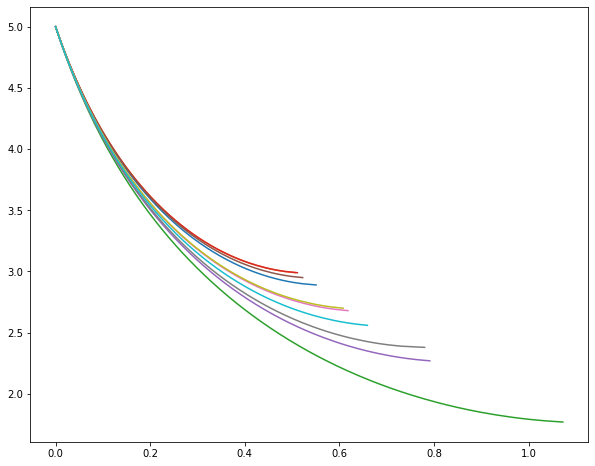

In [3]:
fig, ax = plt.subplots(figsize=(10,8))

for i in range(1,11):
    plt.plot(df['X'+str(i)], df['Y'])

## Example curve fitting for a single set of parameters

One initial way to approach this problem is to "fit" the observed curves to begin exploring the nature of the underlying equation that generated these sample outputs. Looping over the input parameter rows can build an initial dataframe for submission.

In [4]:
from scipy.optimize import curve_fit

# Define a fitting function for scipy curve_fit
def power_fit(x,a,b):
    return a * x ** b

x = df['Y'][289:] # only non-NaN values allowed for curve_fit
y = list(df['X1'][289:])

# Calling the curve_fit function
params, covariance = curve_fit(f = power_fit, xdata = x, ydata = y)

a is  79.96182673838771
b is  -4.748082299190616
covariance: [[ 2.36317804e+01 -2.50123731e-01]
 [-2.50123731e-01  2.66853059e-03]]


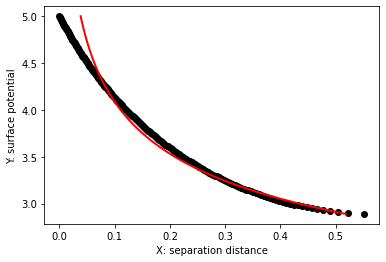

In [5]:
print('a is ', params[0])
print('b is ', params[1])
print('covariance:', covariance)

plt.scatter(y,x,c='black')
plt.xlabel('X: separation distance')
plt.ylabel('Y: surface potential')
plt.plot(power_fit(x,params[0],params[1]), x,c='red',ls='-',lw=2)
plt.show()

## Test parameters for submission

Similar to the sample input file, "stage1_test_input_parameterizations.csv" provides the TEST input parameters from which to estimate the 1D output curves for submission, based on your emprical (or analytical) function approximation approach.
- Please define your TEST submission's linearly sampled space (linspace) from 0 to 5.50, with the same 0.01 sampling interval (i.e., 551 total rows compared to the sample output's 501 rows).

## Submitting results

Please submit a CSV file of your function approximation results using the example format above ("stage1_sample_outputs.csv") at https://xeek.ai/challenges/future-in-charges/ to score your model and update the real-time leaderboard. Final submissions may require complete IPython notebooks (.ipynb and associated .py files) along with the submission CSV your codebook generated.

# References

The Poisson-Boltzmann Equation is covered in literature across many academic subjects, research areas and industries including electrostatics, biomathematics, computational physics, and partial differntial equations. Below are a few select resources that may be useful for this competition.

- [Analytical solution of Poisson–Boltzmann equation for interacting plates of arbitrary potentials and same sign](https://www.researchgate.net/publication/38014632_Analytical_solution_of_PoissonBoltzmann_equation_for_interacting_plates_of_arbitrary_potentials_and_same_sign)
- Poisson-Boltzmann equation formulation: https://www.math.fsu.edu/~quine/biotopics07/PB.pdf